<a href="https://colab.research.google.com/github/AishaLichtner/projects-2019/blob/master/Copy_of_Assignment_1_Pixel_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Pixel Regression.

Can we recover an image by learning a deep regression map from pixels to colors?: $f: (x,y) \to (r,g,b)$.

Our target image will be Mona Lisa:

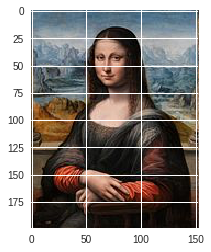

(199, 153, 4)

In [0]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

im = mpimg.imread("https://raw.githubusercontent.com/DataScienceUB/DeepLearningMaster2019/master/data/monalisa.png")

plt.imshow(im)
plt.show()
im.shape

Ourt training dataset will be composed of pixels locations and input and pixel values as output:

In [0]:
X_train = []
Y_train = []
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        X_train.append([float(i),float(j)])
        Y_train.append(im[i][j][:3])
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print('Samples:', X_train.shape[0])
print('(x,y):', X_train[1230],'->', '(r,g,b):',Y_train[0])

Samples: 30447
(x,y): [8. 6.] -> (r,g,b): [0.33333334 0.40784314 0.4627451 ]


Our objective is to train a deep Multilayer Perceptron (MLP) that is able to generate an approximate image, at least as this one:

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/result.png?raw=1)


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/500
30447/30447 [==============================] - 5s 148us/step - loss: 0.1247 - acc: 0.5405
Epoch 2/500
30447/30447 [==============================] - 1s 32us/step - loss: 0.1451 - acc: 0.6426
Epoch 3/500
30447/30447 [==============================] - 1s 32us/step - loss: 0.1454 - acc: 0.6648
Epoch 4/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.2260 - acc: 0.0927
Epoch 5/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.2769 - acc: 0.0638
Epoch 6/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.2770 - acc: 0.0638
Epoch 7/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.2770 - acc: 0.0638
Epoch 8/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.2330 - acc: 0.2527
Epoch 9/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.1456 - acc: 0.6650
Epoch 10/500
30447/30447 [==============================] - 1s 31us/step - loss: 0.1456 - 

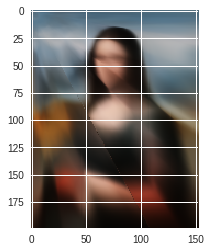

In [0]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation



# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

#alot of neurons and high batch_size and 500 epochs
n=1000
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_norm = Y_train 
X_train_norm = X_train/im.shape[:2]

# use this cell to find the best model architecture

model.fit(X_train, Y_train, nb_epoch=500, shuffle=True, verbose=1, batch_size=10000)
Y = model.predict(X_train, batch_size=10000)
k = 0
im_out = im[:, :, :3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      
        im_out[i,j]= Y[k]
        k += 1   
plt.imshow(im_out)
plt.show()


In [0]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation



# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

#half of the neurons with double amount of epochs 
n=500
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_norm = Y_train 
X_train_norm = X_train/im.shape[:2]

# use this cell to find the best model architecture

model.fit(X_train, Y_train, nb_epoch=1000, shuffle=True, verbose=1, batch_size=15000)
Y = model.predict(X_train, batch_size=15000)
k = 0
im_out = im[:, :, :3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      
        im_out[i,j]= Y[k]
        k += 1   
plt.imshow(im_out)
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
30447/30447 [==============================] - 2s 75us/step - loss: 0.1118 - acc: 0.3684
Epoch 2/1000
30447/30447 [==============================] - 1s 32us/step - loss: 0.1333 - acc: 0.4716
Epoch 3/1000
30447/30447 [==============================] - 1s 32us/step - loss: 0.0478 - acc: 0.6571
Epoch 4/1000
30447/30447 [==============================] - 1s 32us/step - loss: 0.0410 - acc: 0.6688
Epoch 5/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0355 - acc: 0.7510
Epoch 6/1000
30447/30447 [==============================] - 1s 32us/step - loss: 0.0338 - acc: 0.7671
Epoch 7/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0335 - acc: 0.7766
Epoch 8/1000
30447/30447 [==============================] - 1s 31us/step - loss: 0.0333 - acc: 0.7761
Epoch 9/1000
30447/30447 [==============================] - 1s 32us/step - loss: 0.0346 - acc: 0.7904
Epoch 10/1000
30447/30447 [==============================] - 1s 32us/step - loss: 

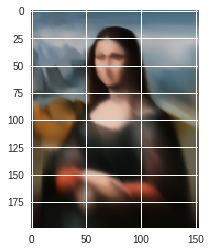

In [0]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation



# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

#1000 neurons with double amount of epochs
n=1000
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_norm = Y_train 
X_train_norm = X_train/im.shape[:2]

# use this cell to find the best model architecture

model.fit(X_train, Y_train, nb_epoch=1000, shuffle=True, verbose=1, batch_size=15000)
Y = model.predict(X_train, batch_size=15000)
k = 0
im_out = im[:, :, :3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      
        im_out[i,j]= Y[k]
        k += 1   
plt.imshow(im_out)
plt.show()


In [0]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation



# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

#1000 neurons with double amount of epochs
n=1000
model = Sequential()

model.add(Dense(n, input_dim=2, activation='relu'))

model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))
model.add(Dense(n, activation='relu'))

model.add(Dense(3, activation='sigmoid'))


# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#normalizing 
Y_train_norm = Y_train 
X_train_norm = X_train/im.shape[:2]

# use this cell to find the best model architecture

model.fit(X_train, Y_train, nb_epoch=1000, shuffle=True, verbose=1, batch_size=500)
Y = model.predict(X_train, batch_size=10000)
k = 0
im_out = im[:, :, :3]
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1   
plt.imshow(im_out)
plt.show()
